# Scratch

In [2]:
import numpy as np
from scipy import stats
import sklearn.metrics as skm

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rc
import matplotlib.font_manager
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=10)        #22
rc('xtick', labelsize=8)  #15
rc('ytick', labelsize=8)  #15
rc('legend', fontsize=8)  #15

w = 3.5
h = 3.25

import matplotlib as mpl
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'

In [3]:
import numpy as np
from scipy import stats
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [4]:
from utils.losses import *
from utils.training import *
import os

In [55]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Basic Model

In [5]:
sqr_zero = get_sqr(0)

In [12]:
y_true = np.append(np.zeros(100), np.ones(100))
y_pred = stats.bernoulli.rvs(1/2, size = 200)

In [15]:
sqr_zero(y_true, y_pred)

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])>

We are considering models of the form $\phi(ax + b)$. 

## $A/B$ Parametrization

In [9]:
# Experiment parameters
num = 0    # bkgd: normal(-0.1, 1)     sgnl: normal(0.1, 1)
reps = 20

# File parameters
dirstr = 'models/univariate/simple/ab_mse/set_{}/'.format(num)
filestr = dirstr + 'model_{}_{}.h5'

if not os.path.isdir(dirstr):
    os.mkdir(dirstr)

# Data parameters
N = 10**6
X = np.load('data/normal/0.1/X_trn.npy')[:N]
y = np.load('data/normal/0.1/y_trn.npy')[:N]
data, m, s = split_data(X, y)
ps = np.round(np.linspace(-2, 2, 101), 2)

In [8]:
# Train models
for p in ps[ps >= -1.2]:
    print('===================================================\n{}'.format(p))
    params = {'loss': get_mse(p)}
    for i in range(reps):
        print(i, end = '\t')
        model, trace = train(data, **params)
        model.save_weights(filestr.format(p, i))

-1.2
0	

2022-08-10 14:31:28.414438: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-08-10 14:31:28.422106: I tensorflow/core/platform/profile_utils/cpu_utils.cc:102] CPU Frequency: 2994530000 Hz
2022-08-10 14:31:28.423567: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a08007d520 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-08-10 14:31:28.423597: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-08-10 14:31:28.563474: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55a0800e7340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-08-10 14:31:28.563547: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2022-08-10 14:31:28.565161: I 

2.694949150085449 	 100	-0.77236265 	 0.0010443691
1	2.3300275802612305 	 100	0.13382892 	 0.000996301
2	2.3070995807647705 	 100	-0.24130069 	 0.00059385254
3	2.305302858352661 	 100	0.04520991 	 0.0001631613
4	3.0917766094207764 	 100	-0.98984176 	 0.0014063108
5	4.08527135848999 	 100	1.1047785 	 0.001390738
6	2.351705551147461 	 100	-0.37590757 	 0.00045087724
7	2.5399277210235596 	 100	-0.642218 	 0.0010516539
8	3.039046049118042 	 100	-0.9666372 	 0.001840028
9	2.308241605758667 	 100	0.058579907 	 0.00043656636
10	2.290814161300659 	 100	-0.09338165 	 0.0013271864
11	2.2910728454589844 	 100	-0.11263418 	 0.0011652937
12	3.1861252784729004 	 100	-1.0284059 	 0.0017507346
13	2.2908170223236084 	 19	-0.0917187 	 0.0006770714
14	2.290818691253662 	 45	-0.094080456 	 0.00040422368
15	2.290818929672241 	 25	-0.091730736 	 -0.00025485686
16	2.345508098602295 	 100	-0.36154884 	 0.00066405605
17	2.797492504119873 	 100	0.65665954 	 0.0009083742
18	2.2908198833465576 	 34	-0.09292723 	 

# Multivariates

In [25]:
h = 0.8
w = h

In [26]:
x = np.linspace(-2, 2, 201)
y = np.linspace(-2, 2, 201)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

In [27]:
N = 4000

g = np.meshgrid(np.linspace(-2, 2, N + 1), np.linspace(-2, 2, N + 1))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)

aa, bb = np.meshgrid(np.linspace(-2.005, 2.005, N + 2), np.linspace(-2.005, 2.005, N + 2))

## Test 0

In [28]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

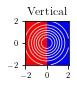

In [29]:
plt.figure(figsize = (w, h))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white', linewidths = 0.75)

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1
plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr', rasterized = True)

plt.gca().set_aspect('equal')
plt.title('Vertical')

plt.savefig('plots/pres/vertical.pdf', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 1

In [34]:
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg_bkgd = np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

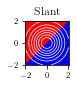

In [35]:
plt.figure(figsize = (w, h))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -\frac{0.1}{\sqrt{2}} \\ +\frac{0.1}{\sqrt{2}} \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +\frac{0.1}{\sqrt{2}} \\ -\frac{0.1}{\sqrt{2}} \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white', linewidths = 0.75)

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr', rasterized = True)
plt.gca().set_aspect('equal')
plt.title('Slant')

plt.savefig('plots/pres/slant.pdf', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 2

In [32]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

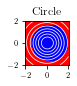

In [33]:
plt.figure(figsize = (w, h))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white', linewidths = 0.75)

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr', rasterized = True)
plt.gca().set_aspect('equal')
plt.title('Circle')

plt.savefig('plots/pres/circle.pdf', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 3

In [36]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

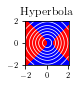

In [37]:
plt.figure(figsize = (w, h))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white', linewidths = 0.75)

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr', rasterized = True)
plt.gca().set_aspect('equal')
plt.title('Hyperbola')

plt.savefig('plots/pres/hyperbola.pdf', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

## Test 4

In [38]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

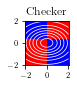

In [39]:
plt.figure(figsize = (w, h))
#plt.text(-2, 3, r'$X_{\rm bkgd} \sim \text{Normal}\left( \begin{bmatrix} -0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & \frac{1}{4} \\ \frac{1}{4} & 1 \end{bmatrix} \right)$');
#plt.text(-2, 2.3, r'$X_{\rm sgnl} \sim \text{Normal}\left( \begin{bmatrix} +0.1 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & -\frac{1}{4} \\ -\frac{1}{4} & 1 \end{bmatrix} \right)$');

plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)), colors='white', linewidths = 0.75)

zz = np.zeros((N + 1)**2)
zz[sgnl.pdf(g) / bkgd.pdf(g) <= 1] = 1
zz[sgnl.pdf(g) / bkgd.pdf(g) > 1] = -1

plt.pcolormesh(aa, bb, zz.reshape(N + 1, N + 1), cmap = 'bwr', rasterized = True)
plt.gca().set_aspect('equal')
plt.title('Checker')
plt.savefig('plots/pres/checker.pdf', 
            dpi = 300, 
            transparent = True, 
            bbox_inches = 'tight')

# Testing Flows

In [5]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

from flows.flows import *



## MC

In [8]:
mc = np.load("data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

sim_pt =  mc['sim_jets'][:, 0]
sim_eta = mc['sim_jets'][:, 1]
sim_phi = mc['sim_jets'][:, 2]
sim_m =   mc['sim_jets'][:, 3]

sim = np.vstack([sim_pt, sim_eta, sim_phi, sim_m]).T

In [10]:
n, d = sim.shape

sim_target = make_target(d)
sim_ckpt = tf.train.Checkpoint(sim_target)
sim_ckpt.restore('flows/sim/ckpt-79')

In [11]:
X_bkgd = sim_target.sample(n)
X_sgnl = sim

In [55]:
np.random.seed(666)

# Create full dataset; randomly sample points from Data or Flow with chance 1/2.
y = stats.bernoulli.rvs(0.5, size = n).astype('float32')
X = np.zeros_like(X_bkgd)

X[y == 0] = X_bkgd[y == 0]
X[y == 1] = X_sgnl[y == 1]

# Take 70% of data to be training data.
N_trn = int(0.7*n)
trn_idx = np.random.choice(range(n), N_trn, replace = False)
tst_idx = [n for n in range(n) if n not in trn_idx]

X_trn = X[trn_idx]
y_trn = y[trn_idx]

X_tst = X[tst_idx]
y_tst = y[tst_idx]

data, m, s = split_data(X_trn, y_trn)

In [56]:
params = {'loss':bce, 'd':4}

clf, trace = train(data, **params)

Epoch 1/100
8/8 [==============================] - 0s 18ms/step - loss: 0.6905 - accuracy: 0.5295 - val_loss: 0.6842 - val_accuracy: 0.5734
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6848 - accuracy: 0.5559 - val_loss: 0.6796 - val_accuracy: 0.5786
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6815 - accuracy: 0.5665 - val_loss: 0.6763 - val_accuracy: 0.5831
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.5712 - val_loss: 0.6740 - val_accuracy: 0.5814
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6770 - accuracy: 0.5730 - val_loss: 0.6723 - val_accuracy: 0.5866
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6755 - accuracy: 0.5789 - val_loss: 0.6708 - val_accuracy: 0.5870
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.5796 - val_loss: 0.6697 - val_accuracy: 0.5890
Epoch 8/100
8/8 [=========

In [77]:
y_hat = clf.predict(X_tst)
fpr, tpr, ts = skm.roc_curve(y_tst, y_hat)
auc = skm.roc_auc_score(y_tst, y_hat)

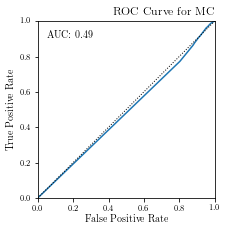

In [87]:
fig, ax = plt.subplots(figsize = (w, h))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, ls = ':', c = 'k', lw = 1)

plt.title('ROC Curve for MC', loc = 'right')
plt.text(0.05, 0.9, 'AUC: {}'.format(round(auc, 2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.gca().set_aspect('equal')

plt.savefig('plots/zenodo/mc_roc.png', dpi = 300, transparent = True,
            bbox_inches = 'tight')

## Data

In [88]:
dat = np.load("data/zenodo/Herwig_Zjet_pTZ-200GeV_0.npz")

dat_pt =  dat['sim_jets'][:, 0] # dat[:, 0]
dat_eta = dat['sim_jets'][:, 1]
dat_phi = dat['sim_jets'][:, 2]
dat_m =   dat['sim_jets'][:, 3]

dat = np.vstack([dat_pt, dat_eta, dat_phi, dat_m]).T

In [92]:
n, d = dat.shape

dat_target = make_target(d)
dat_ckpt = tf.train.Checkpoint(dat_target)
dat_ckpt.restore('flows/dat/ckpt-79')

In [93]:
X_bkgd = dat_target.sample(n)
X_sgnl = dat

In [94]:
np.random.seed(666)

# Create full dataset; randomly sample points from Data or Flow with chance 1/2.
y = stats.bernoulli.rvs(0.5, size = n).astype('float32')
X = np.zeros_like(X_bkgd)

X[y == 0] = X_bkgd[y == 0]
X[y == 1] = X_sgnl[y == 1]

# Take 70% of data to be training data.
N_trn = int(0.7*n)
trn_idx = np.random.choice(range(n), N_trn, replace = False)
tst_idx = [n for n in range(n) if n not in trn_idx]

X_trn = X[trn_idx]
y_trn = y[trn_idx]

X_tst = X[tst_idx]
y_tst = y[tst_idx]

data, m, s = split_data(X_trn, y_trn)

In [95]:
params = {'loss':bce, 'd':4}

clf, trace = train(data, **params)

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 0.6877 - accuracy: 0.5417 - val_loss: 0.6754 - val_accuracy: 0.5837
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6746 - accuracy: 0.5840 - val_loss: 0.6706 - val_accuracy: 0.5915
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6713 - accuracy: 0.5889 - val_loss: 0.6681 - val_accuracy: 0.5951
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6693 - accuracy: 0.5921 - val_loss: 0.6673 - val_accuracy: 0.5937
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6679 - accuracy: 0.5933 - val_loss: 0.6667 - val_accuracy: 0.5932
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6674 - accuracy: 0.5942 - val_loss: 0.6661 - val_accuracy: 0.5924
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.5946 - val_loss: 0.6659 - val_accuracy: 0.5927
Epoch 8/100
8/8 [=========

In [96]:
y_hat = clf.predict(X_tst)
fpr, tpr, ts = skm.roc_curve(y_tst, y_hat)
auc = skm.roc_auc_score(y_tst, y_hat)

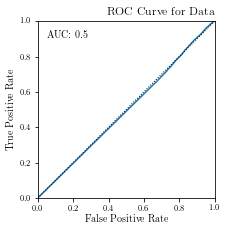

In [97]:
fig, ax = plt.subplots(figsize = (w, h))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, ls = ':', c = 'k', lw = 1)


plt.title('ROC Curve for Data', loc = 'right')
plt.text(0.05, 0.9, 'AUC: {}'.format(round(auc, 2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.gca().set_aspect('equal')

plt.savefig('plots/zenodo/dat/data_roc.png', dpi = 300, transparent = True,
            bbox_inches = 'tight')

# Trees

In [7]:
from xgboost import XGBClassifier

In [14]:
# Experiment parameters
num = 0
reps = 100
d = 1
Ns = 10**np.arange(2, 8)

# Model parameters
bce_params = {'loss':bce, 'd': d}

filestr = 'models/trees/{}/set_{}/'.format(d, num)
bce_filestr = filestr + 'bce/model_{}_{}.h5'
bdt_filestr = filestr + 'bdt/model_{}_{}.h5'

if not os.path.isdir(filestr):
    os.mkdir(filestr)

if not os.path.isdir(filestr + 'bce/'):
    os.mkdir(filestr + 'bce/')
    
if not os.path.isdir(filestr + 'bdt/'):
    os.mkdir(filestr + 'bdt/')

# Data parameters
X = np.load('data/trees/{}/X_trn.npy'.format(d)).reshape(-1, 1)
y = np.load('data/trees/{}/y_trn.npy'.format(d)).astype('float32')

In [ ]:
N = 10**6
data, m, s = split_data(X[:N], y[:N])

bdt_model_1 = XGBClassifier(early_stopping_rounds = 10)
X_trn, X_vld, y_trn, y_vld = data
bdt_model_1.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
trace = bdt_model_1.evals_result()['validation_0']
print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')

bdt_model_2 = XGBClassifier(early_stopping_rounds = 10)
X_trn, X_vld, y_trn, y_vld = data
bdt_model_2.fit(X_trn, y_trn, eval_set = [(X_vld, y_vld)], verbose = 0)
trace = bdt_model_2.evals_result()['validation_0']
print(trace['logloss'][-1], '\t', len(trace['logloss']), end = '\n')

0.6880921275365353 	 18
0.6880921275365353 	 18


In [ ]:
X_tst = np.load('data/trees/{}/X_tst.npy'.format(d)).reshape(-1, 1)

In [ ]:
bdt_model_1.predict_proba(X_tst).mean()

0.5

In [ ]:
bdt_model_2.predict_proba(X_tst).mean()

0.5

In [ ]:
np.max(bdt_model_1.predict_proba(X_tst) - bdt_model_2.predict_proba(X_tst))

0.0

# Check Bad Points

In [5]:
# Experiment parameters
num = 0
reps = 100

# Model parameters
params_1 = {'loss':bce, 'd':4}
params_2 = {'loss':tanh_bce, 'd':4, 'output': 'linear'}
params_3 = {'loss':arctan_bce, 'd':4,  'output': 'linear'}

filestr = 'models/zenodo/c_bce/set_{}/'.format(num)
filestr_1 = filestr + 'sigmoid/model_{}.h5'
filestr_2 = filestr + 'tanh/model_{}.h5'
filestr_3 = filestr + 'arctan/model_{}.h5'

# Data parameters
N = 10**6
X = np.load('data/zenodo/X_trn.npy')[:N]
y = np.load('data/zenodo/y_trn.npy')[:N].astype('float32')
X_mae = np.load('data/zenodo/' + 'X_tst.npy')
data, m, s = split_data(X, y)

In [6]:
abs_dif_1 = np.load(filestr + 'abs_dif_1.npy')
bad_points = X_mae[np.any(abs_dif_1 > 100, axis = 0)]

Text(0.0, 1.0, 'BCE Points with MAE Exceeding 100')

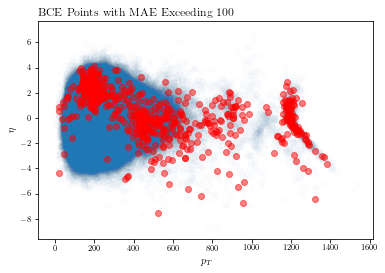

In [23]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.01, label = 'Flow')
plt.scatter(nan_points[:, 0], nan_points[:, 1], alpha = 0.5, c = 'red', label = '> 100')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\eta$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

plt.savefig('plots/zenodo/bce_pt_eta.png', 
            dpi=300, 
            bbox_inches='tight')

Text(0.0, 1.0, 'BCE Points with MAE Exceeding 100')

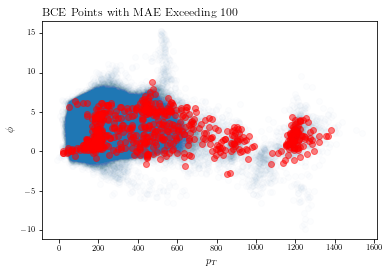

In [24]:
plt.scatter(X[:, 0], X[:, 2], alpha = 0.01)
plt.scatter(nan_points[:, 0], nan_points[:, 2], alpha = 0.5, c = 'red')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$\phi$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

Text(0.0, 1.0, 'BCE Points with MAE Exceeding 100')

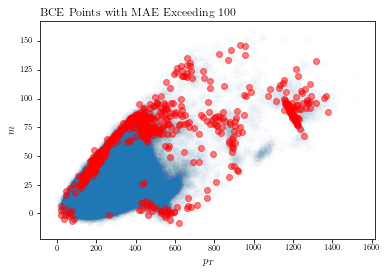

In [28]:
plt.scatter(X[:, 0], X[:, 3], alpha = 0.01)
plt.scatter(nan_points[:, 0], nan_points[:, 3], alpha = 0.5, c = 'red')
plt.xlabel(r'$p_T$')
plt.ylabel(r'$m$')
plt.title('Points with BCE MAE Exceeding 100', loc = 'left')

Text(0.0, 1.0, 'BCE Points with MAE Exceeding 100')

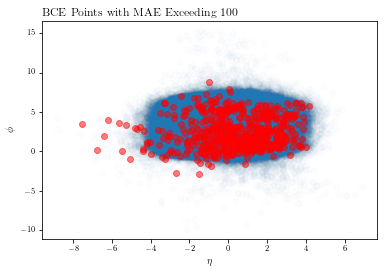

In [29]:
plt.scatter(X[:, 1], X[:, 2], alpha = 0.01)
plt.scatter(nan_points[:, 1], nan_points[:, 2], alpha = 0.5, c = 'red')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title('BCE Points with MAE Exceeding 100', loc = 'left')

Text(0.0, 1.0, 'BCE Points with MAE Exceeding 100')

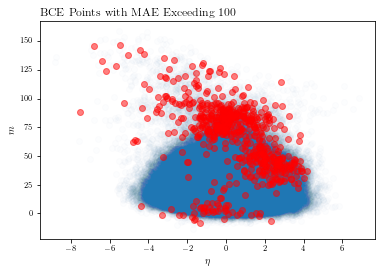

In [30]:
plt.scatter(X[:, 1], X[:, 3], alpha = 0.01)
plt.scatter(nan_points[:, 1], nan_points[:, 3], alpha = 0.5, c = 'red')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$m$')
plt.title('BCE Points with MAE Exceeding 100', loc = 'left')

Text(0.0, 1.0, 'BCE Points with MAE Exceeding 100')

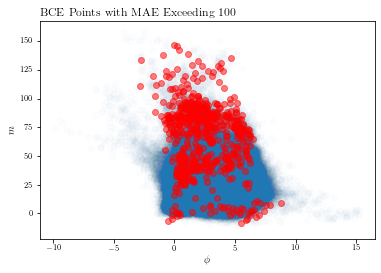

In [31]:
plt.scatter(X[:, 2], X[:, 3], alpha = 0.01)
plt.scatter(nan_points[:, 2], nan_points[:, 3], alpha = 0.5, c = 'red')
plt.xlabel(r'$\phi$')
plt.ylabel(r'$m$')
plt.title('BCE Points with MAE Exceeding 100', loc = 'left')

In [27]:
np.mean(abs_dif_1 > 100)

0.0059426

# Zenodo

In [5]:
mc = np.load("data/zenodo/Pythia21_Zjet_pTZ-200GeV_0.npz")

sim_pt =  mc['sim_jets'][:, 0]
sim_eta = mc['sim_jets'][:, 1]
sim_phi = mc['sim_jets'][:, 2]
sim_m =   mc['sim_jets'][:, 3]

sim = np.vstack([sim_pt, sim_eta, sim_phi, sim_m]).T

data = np.load("data/zenodo/Herwig_Zjet_pTZ-200GeV_0.npz")

dat_pt =  data['sim_jets'][:, 0]
dat_eta = data['sim_jets'][:, 1]
dat_phi = data['sim_jets'][:, 2]
dat_m =   data['sim_jets'][:, 3]

dat = np.vstack([dat_pt, dat_eta, dat_phi, dat_m]).T

In [7]:
mc

In [9]:
mc['sim_particles'].shape

(100000, 83, 4)

# Old

In [ ]:
1/0

In [ ]:
u = stats.multivariate_normal([-3, 0], [[4, 0], [0, 1]])
v = stats.multivariate_normal([3, 0], [[1, 0], [0, 4]])

In [ ]:
plt.contour(xx, yy, 0.5 * (u.pdf(pos) + v.pdf(pos)))
cc = pos[u.pdf(pos) / v.pdf(pos) < 1]
dd = pos[u.pdf(pos) / v.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'red')
plt.scatter(dd[:, 0], dd[:, 1], c = 'blue')
#ee = pos[(u.pdf(pos) / v.pdf(pos) <= 1.1) & (u.pdf(pos) / v.pdf(pos) >= 0.9)]
#plt.scatter(dd[:, 0], dd[:, 1], c = 'blue', s = .01)
plt.gca().set_aspect('equal')

# Checkpoints

In [16]:
i = 1
while os.path.isfile('flows/dat/full/ckpt-{}.index'.format(i)):
    i = i + 1

In [17]:
i

60216

In [18]:
i = 1
while os.path.isfile('flows/sim/full/ckpt-{}.index'.format(i)):
    i = i + 1

In [19]:
i

53844

In [20]:
sim_aucs = np.load('flows/sim_aucs.npy')

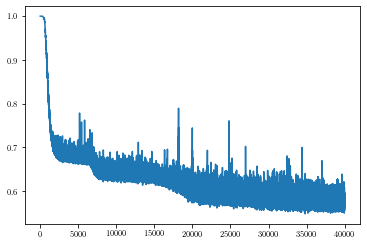

In [21]:
plt.plot(sim_aucs)

In [22]:
np.argmin(sim_aucs), sim_aucs[np.argmin(sim_aucs)]

(34812, 0.5482844140880898)

In [23]:
dat_aucs = np.load('flows/dat_aucs.npy')

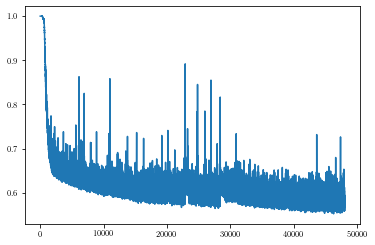

In [13]:
plt.plot(dat_aucs)

In [15]:
np.argmin(dat_aucs), dat_aucs[np.argmin(dat_aucs)]

(46266, 0.5523867393348465)